Image/Video Detection  
https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb#scrollTo=7mGmQbAO5pQb

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 9039, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 9039 (delta 1), reused 1 (delta 1), pack-reused 9036
Receiving objects: 100% (9039/9039), 9.70 MiB | 23.76 MiB/s, done.
Resolving deltas: 100% (6267/6267), done.
/content/yolov5


In [ ]:
!pip install imgaug==0.2.5
%pip install -qr requirements.txt  # install dependencies

     |████████████████████████████████| 562 kB 5.3 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.5-py3-none-any.whl size=561438 sha256=f59614315513fc9c1081e199add9220fb01ac224b9d4f76a865916935ca5c3ab
  Stored in directory: /root/.cache/pip/wheels/60/dd/38/d1dc2cad2b6a66dc0249261004990bccb0f27985c74ba26e49
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 636 kB 5.4 MB/s 


Image Detection

In [ ]:
import torch
from IPython.display import Image, YouTubeVideo, clear_output  # to display images
from IPython.core.display import Video

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla K80)


detect: weights=['yolov5s.pt'], source=data/images/catngranpa.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-414-g0d8a184 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/1 /content/yolov5/data/images/catngranpa.jpg: 448x640 1 person, 1 cat, 1 bowl, 1 pizza, 1 potted plant, 1 dining table, Done. (0.031s)
Results saved to runs/detect/exp
Done. (0.047s)


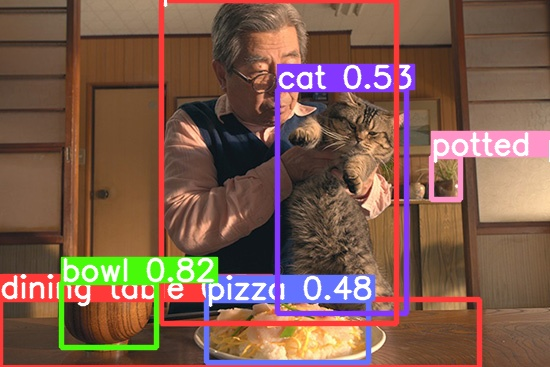

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/catngranpa.jpg
Image(filename='runs/detect/exp/catngranpa.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images/cats.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-414-g0d8a184 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/1 /content/yolov5/data/images/cats.jpg: 640x640 8 cats, 2 dogs, Done. (0.037s)
Results saved to runs/detect/exp2
Done. (0.071s)


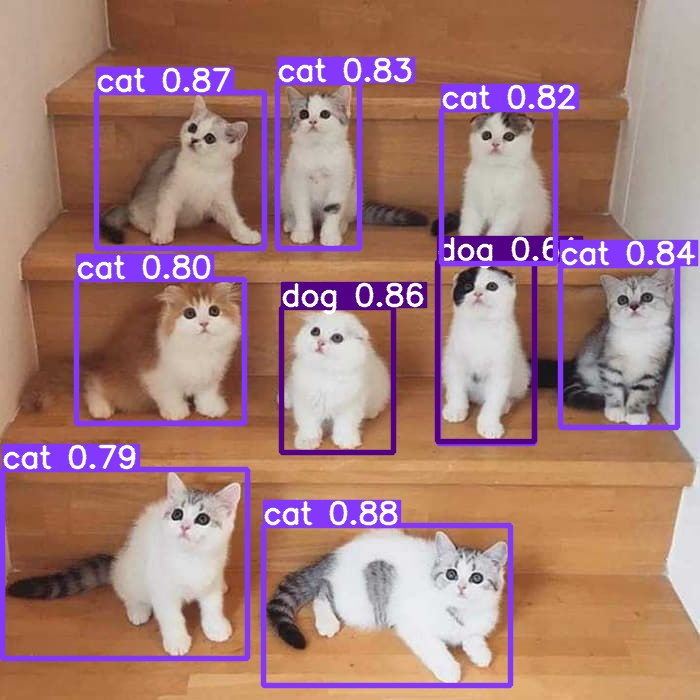

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/cats.jpg
Image(filename='runs/detect/exp2/cats.jpg', width=600)

YouTube (Video) Detection 

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source 'https://youtu.be/7_OFIIRQX6A'
Video('runs/detect/exp3/7_OFIIRQX6A.mp4')

detect: weights=['yolov5s.pt'], source=https://youtu.be/7_OFIIRQX6A, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-414-g0d8a184 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
cv2.imshow() is disabled in Google Colab environments
1/1: https://youtu.be/7_OFIIRQX6A...  success (3879 frames 1280x720 at 29.97 FPS)

0: 384x640 1 person, 2 cats, Done. (0.795s)
0: 384x640 1 person, 2 cats, 1 cup, Done. (0.016s)
0: 384x640 2 cats, 1 cup, 1 cell phone, Done. (0.016s)
0: 384x640 1 person, 3 cats, 1 cup, Done. (0.016s)
0: 384x640 1 person, 2 cats, 1 cup, Done. (0.016s)
0: 384x640 1 person, 2 cats, 1 cup, 1 bo

Image capture from Webcam  
https://mingxoxo-record.tistory.com/26

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
  async function takePhoto(quality){
    //div(공간) 생성
    const div = document.createElement('div');
    //button 생성
    const capture = document.createElement('button');
    capture.textContent = 'Capture'
    div.appendChild(capture);
    //video 생성
    const video = document.createElement('video');
    //비디오 모양 네모
    video.style.display = 'block';
    //카메라(웹캠 불러오기)
    const stream = await navigator.mediaDevices.getUserMedia({video:true});
    //div 밑에 child 공간 추가
    document.body.appendChild(div);
    //공간에 video 넣기
    div.appendChild(video);
    //video와 웹캠 연결
    video.srcObject = stream;
    //비동기식 처리
    await video.play();
    //Resize output to fit video element
    google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
    //Wait for Capture to be clicked
    await new Promise((resolve) => capture.onclick = resolve);

    //canvas 생성
    const canvas = document.createElement('canvas');
    //크기 맞추기
    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;
    //이미지 그리기
    canvas.getContext('2d').drawImage(video, 0, 0);
    //비디오 끄기
    stream.getVideoTracks()[0].stop();
    //div 삭제
    div.remove();
    //파일 주소 반환
    return canvas.toDataURL('image/jpeg', quality); 
  }
  ''')
  display(js)
  # Javascript 리턴 값을 파이썬에 전달
  data = eval_js('takePhoto({})'.format(quality))
  # 웹 브라우저에서 데이터를 저장할 때 base64로 저장
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


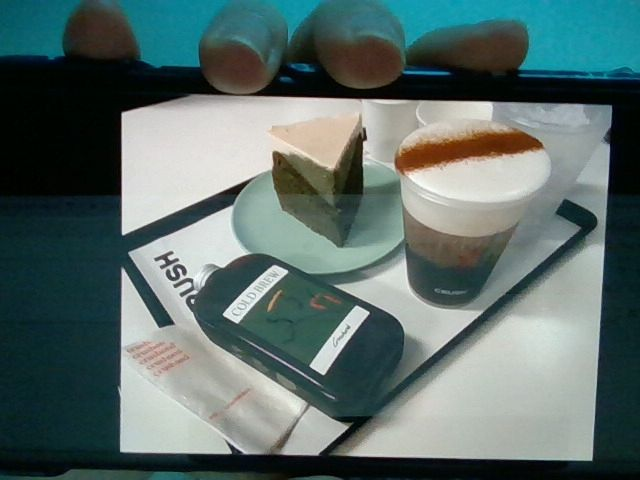

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  display(Image(filename))
except Exception as err:
  print(str(err))

detect: weights=['yolov5s.pt'], source=data/images/photo.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-447-g4d1a2ac torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/1 /content/yolov5/data/images/photo.jpg: 480x640 1 cup, Done. (0.030s)
Speed: 0.5ms pre-process, 30.4ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


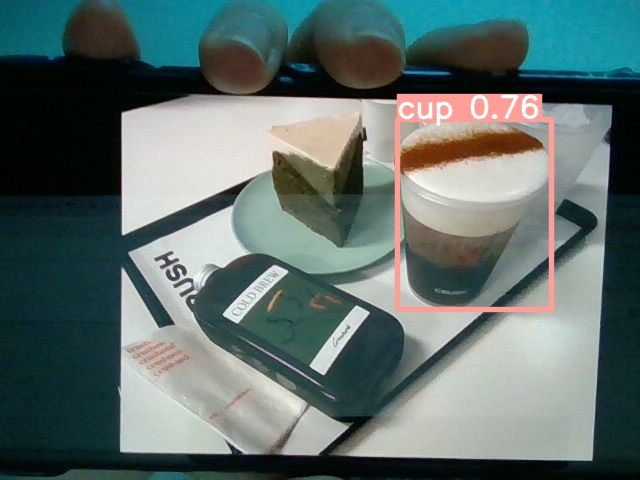

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images/photo.jpg
Image(filename='runs/detect/exp/photo.jpg', width=600)

Mask Wearing Object Detection  
https://jackyoon5737.tistory.com/188

In [ ]:
!cd /content/

In [ ]:
!curl -L "https://public.roboflow.com/ds/MyJFGvryAZ?key=zpSNktYC1i" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1824      0 --:--:-- --:--:-- --:--:--  1824
100 18.5M  100 18.5M    0     0  20.8M      0 --:--:-- --:--:-- --:--:--  195M
Archive:  roboflow.zip
 extracting: test/images/1288126-10255706714jpg_jpg.rf.ed230c79fdbb1fa0650ff4fd32f620ee.jpg  
 extracting: test/images/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg  
 extracting: test/images/15391513324714o1n0r10n6_jpg.rf.eb6b6b796ad74b0c9d75011d1020f0af.jpg  
 extracting: train/images/1125506397_15801322206131n_jpg.rf.0a60284a71b2d0ed77c002e768b39b00.jpg  
 extracting: test/images/1579924271_jpg.rf.1fea0f43731fbea2876f63135256004f.jpg  
 extracting: train/images/1_R_kFK9pNLfKAuopY_lAaPQ_jpeg.rf.030922effaedbead963acea666441dbd.jpg  
 extracting: test/images/1224331650_g_400-w_g_jpg.rf.483a35a2395bf48e96783587a59fe876.jpg  
 extra

In [ ]:
!ls

CONTRIBUTING.md  export.py	     README.md		  train.py
data		 hubconf.py	     README.roboflow.txt  tutorial.ipynb
data.yaml	 LICENSE	     requirements.txt	  utils
detect.py	 models		     test		  valid
Dockerfile	 README.dataset.txt  train		  val.py


In [ ]:
!cat data.yaml

train: ./train/images
val: ./valid/images

nc: 2
names: ['mask', 'no-mask']

In [ ]:
!cd /content/yolov5/

In [ ]:
!python train.py --img 500 --batch 16 --epoch 100 --data ./data.yaml --cfg ./models/yolov5s.yaml --weights ''

train: weights=, cfg=./models/yolov5s.yaml, data=./data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=500, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0, patience=100
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 6 (delta 1), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/ultralytics/yolov5
   4d1a2ac..9ef9494  master     -> origin/master
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolo

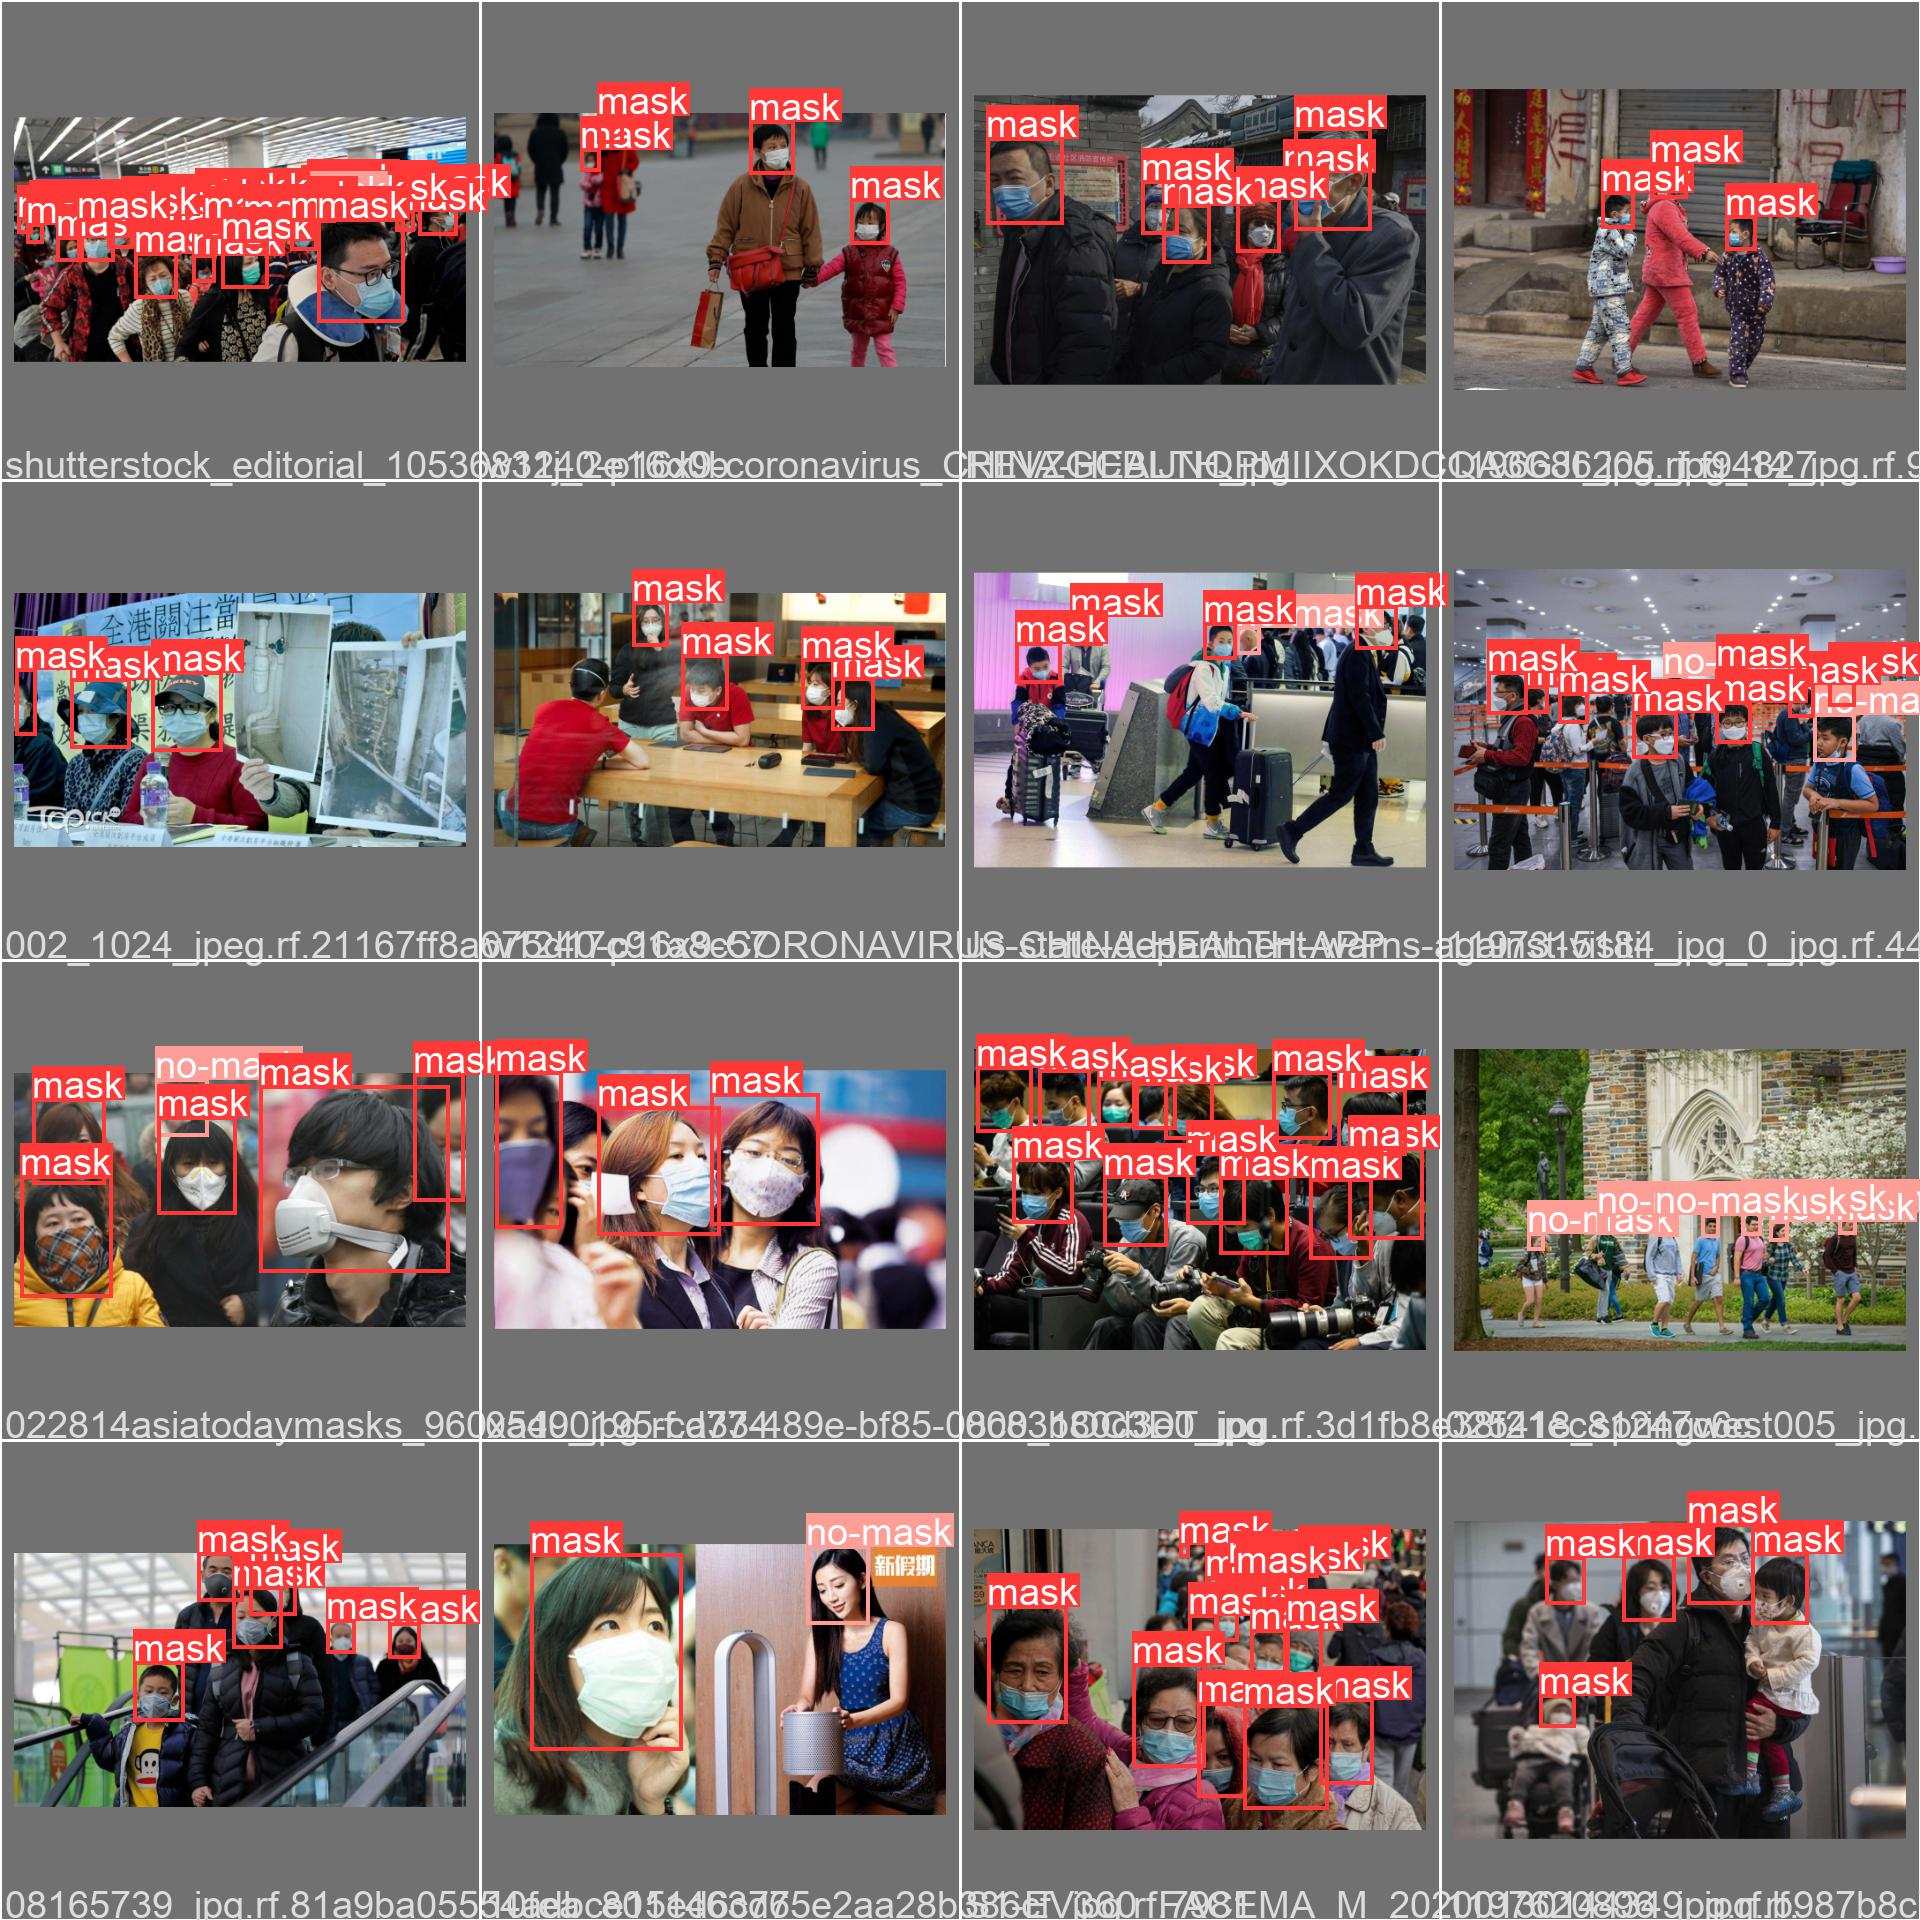

In [ ]:
Image(filename='./runs/train/exp3/val_batch0_labels.jpg', width=900)

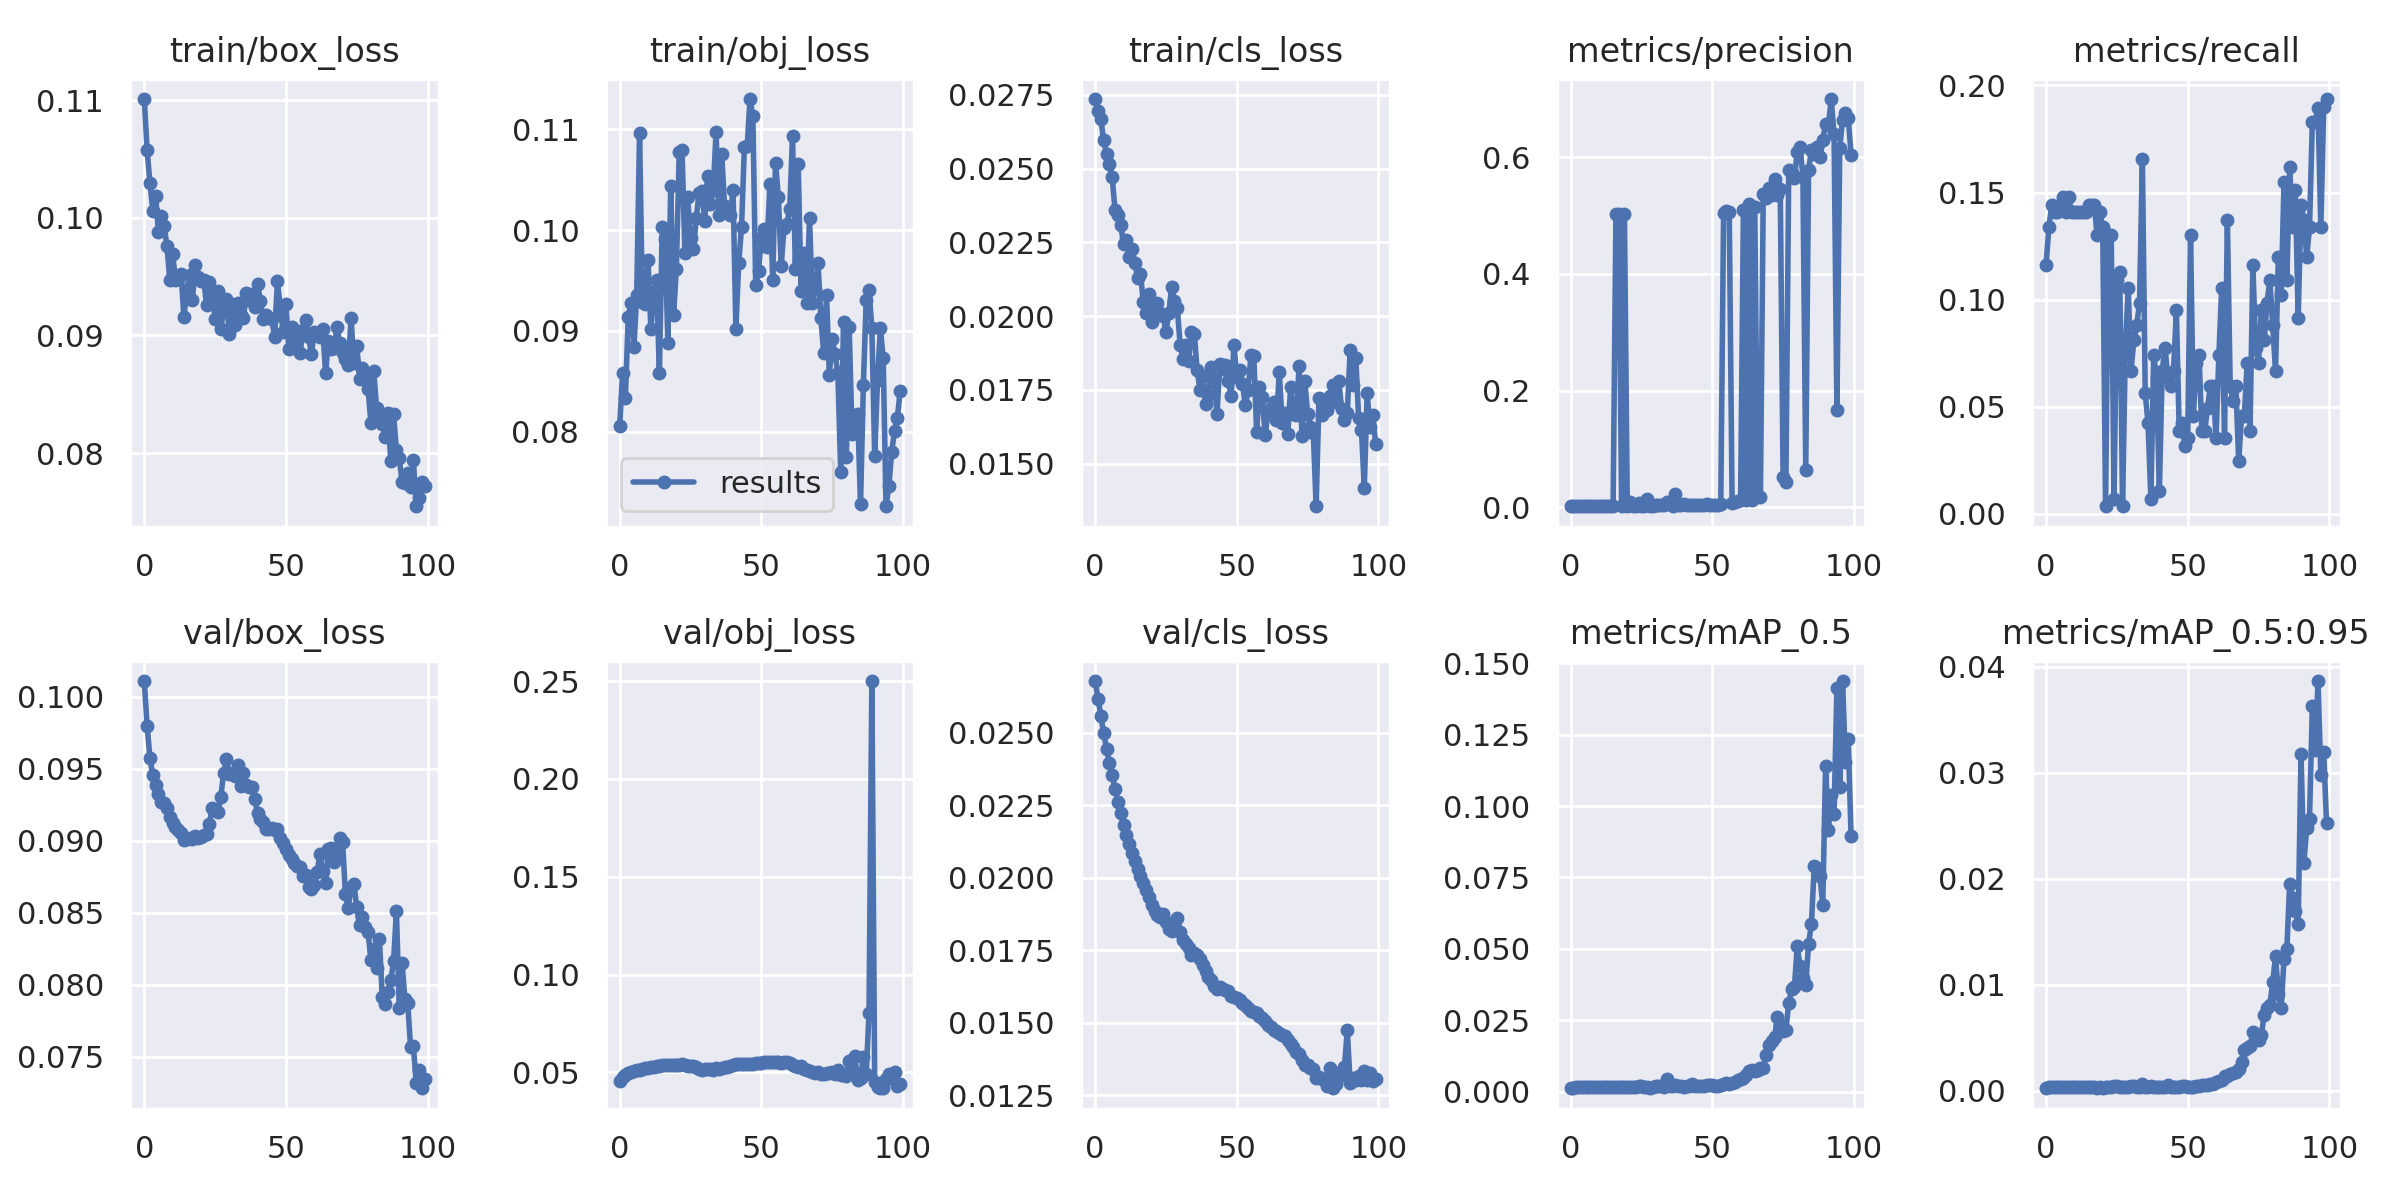

In [ ]:
Image(filename='./runs/train/exp3/results.png', width=900)

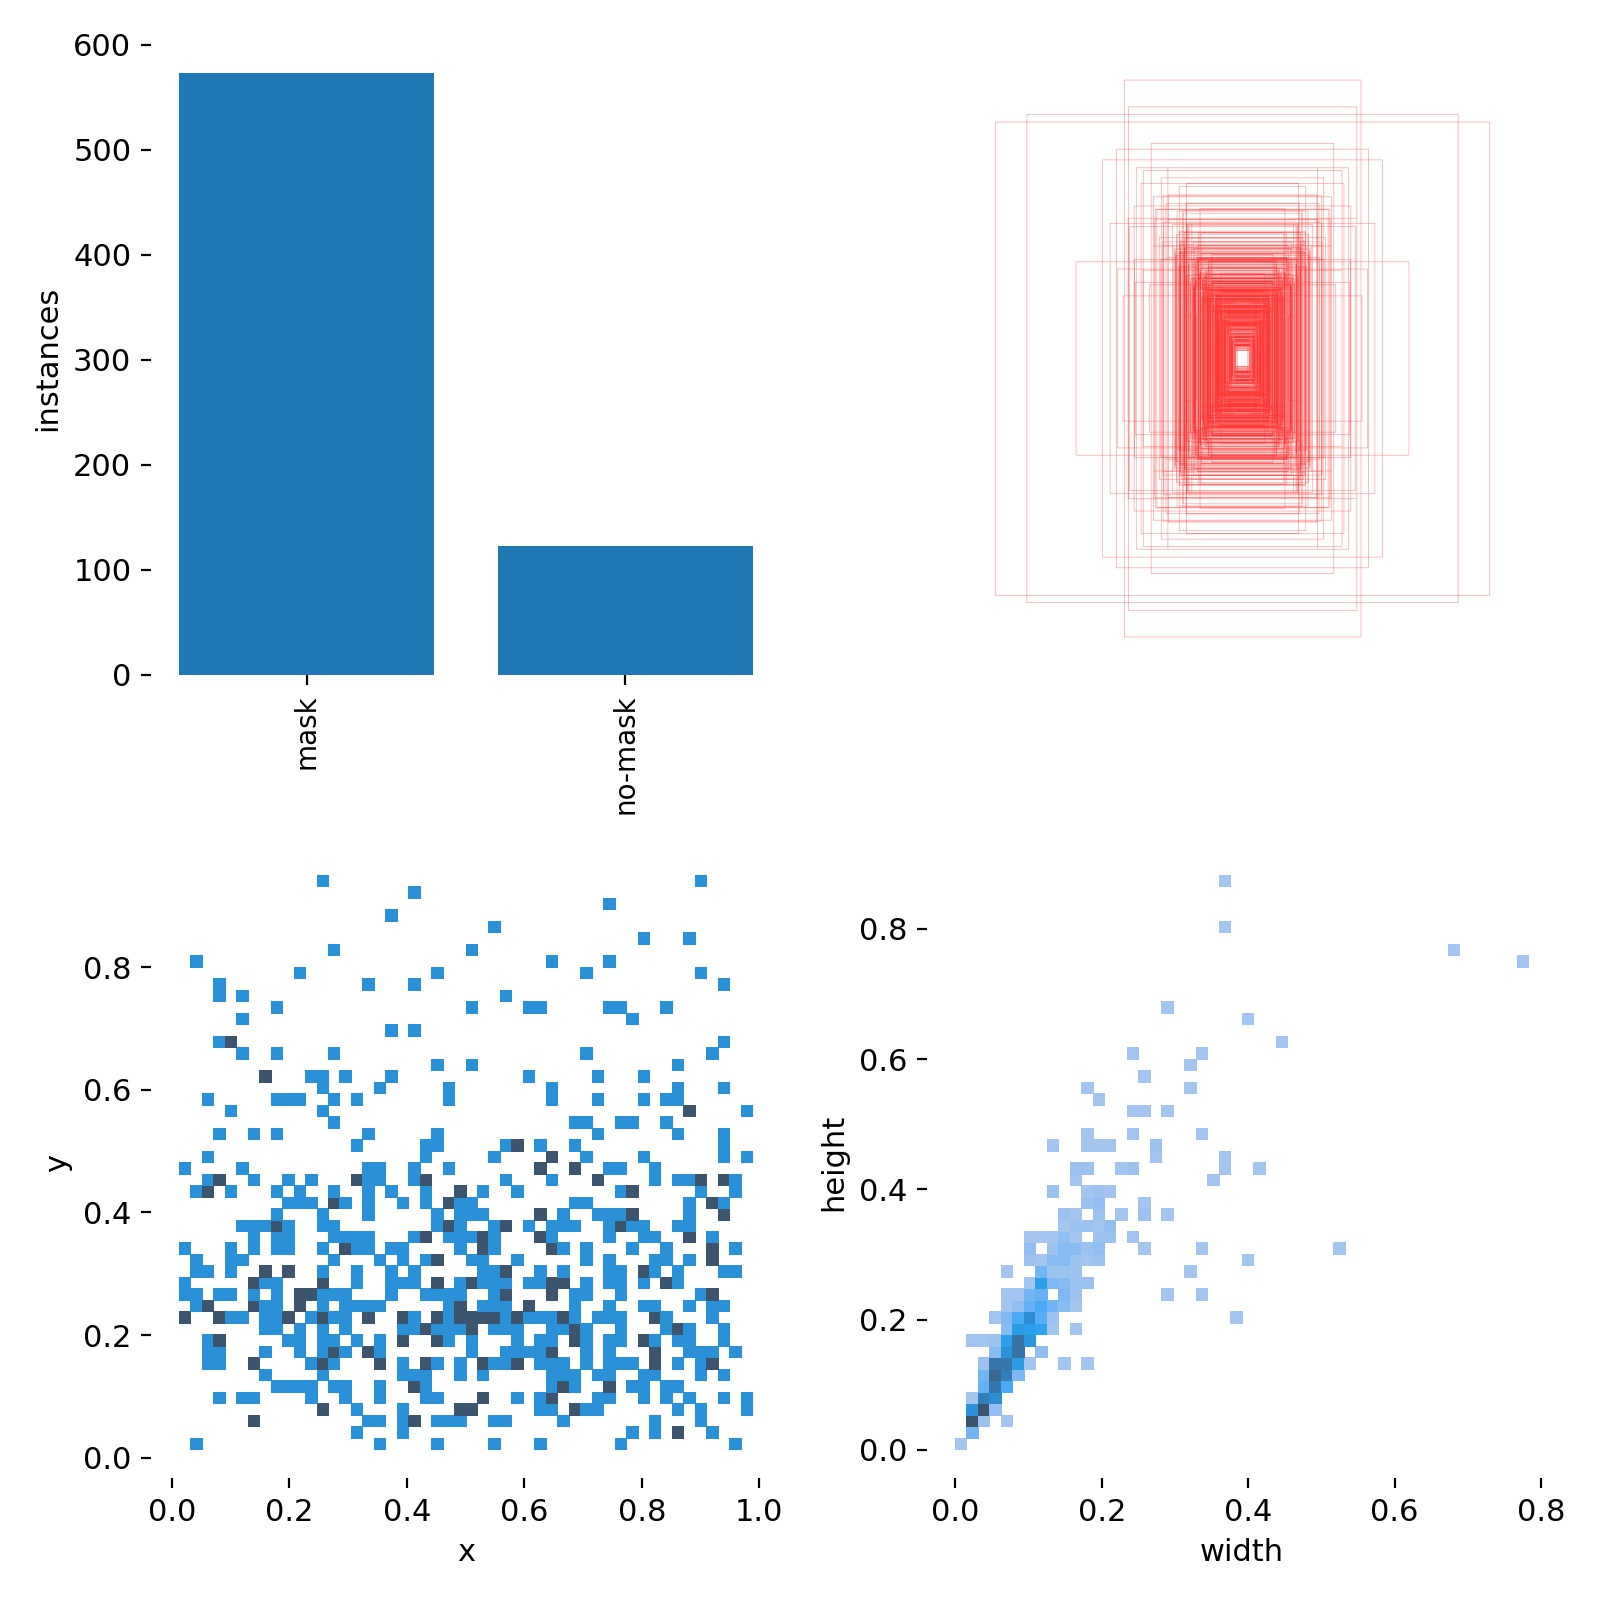

In [ ]:
Image(filename='./runs/train/exp3/labels.jpg', width=900)

In [ ]:
!cd /content/yolov5/

In [ ]:
!cd test/

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving eval.png to eval.png


In [ ]:
!python detect.py --source ./eval.png --weights ./runs/train/exp3/weights/best.pt --conf 0.4

detect: weights=['./runs/train/exp3/weights/best.pt'], source=./eval.png, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-447-g4d1a2ac torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7056607 parameters, 0 gradients, 16.3 GFLOPs
image 1/1 /content/yolov5/eval.png: 384x640 6 masks, Done. (0.025s)
Speed: 0.4ms pre-process, 24.8ms inference, 1.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


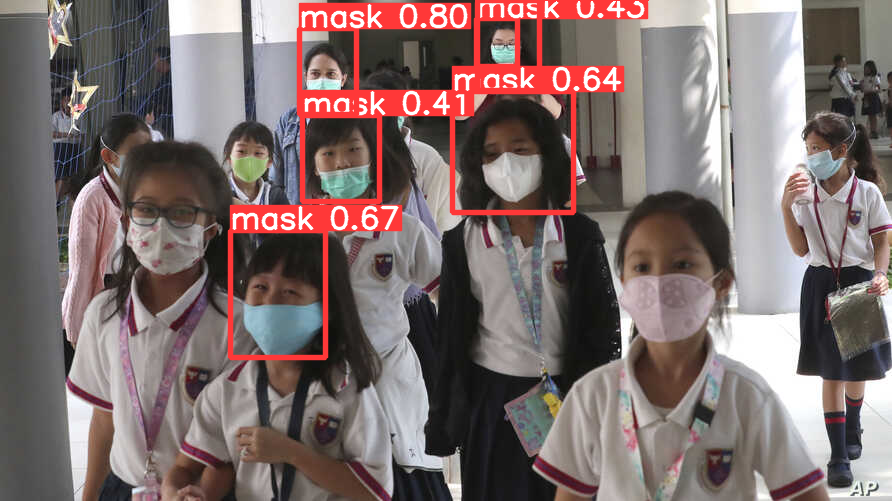

In [ ]:
Image(filename='./runs/detect/exp3/eval.png', width=300)